## Ahsan Fayyaz

## CLIMATE CHANGE in New York City! Is it real?

### Purpose:
We all have somewhere at some point heard about __climate change__ as the next big threat to our planet & that our Earth's temperatures have been rising over past __100-150 years__, (ever since industrial revolution) and will continue to do so if we do not take any prompt action.
This is happening due to human activity such as heavy emissions of __CarbonDioxide__ and other __greenhouse gases__ into the atmosphere. Sources of C02 are combustion of fuel for cars, industries that depend on coal, electric companies, and etc.
Many people around the world show skepticism towards climate change and consider it nothing but a myth. Goal of my project is to find out truth about temperature change.

For my analysis, I have picked New York City and collected various data sets for __average temperatures__ and __C02 level__ for the New York City over past 100-150 years.

With my data, I will be able to draw valid conclusions to common questions like,

 > - "Whether C02 levels have increased in atmosphere since 1850s?"
 > - "Whether temperatures of NYC in summers have increased since 1850s?"
 > - "Is there a correlation between C02 levels, and average temperatures?"
 > - "Do we actually see a relationship between 'Years passed' and rising temperatures?"
 > - "Have the average annual temperatures in NYC increased since 1869?"



Two Datasets I have pulled from web are as follows:
    1. Average Temperatures in NYC
    2. C02 Levels in Atmosphere
For a better analysis I will clean my dataset into the years __1869-2014__ and only use these years to draw any conclusion

#### Next cell imports all the libraries from python that will be used to pull, extract, clean and visualize my data as I tell the story

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math


### Let's begin exploring the data..


Dataset #1:
    __Temperatures(mean) in the New York City__

- This the dataset for average temperatures of New York City from year 1869 - 2014

In [2]:
full_mean_temp = pd.read_csv('/home/ahsan/Spring2019/csc217/Project/Datasets/Temperature_datasets/Full_temp.csv',header=0)
mean_temp = full_mean_temp[full_mean_temp['YEAR'] <= 2014]
mean_temp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7,51.4
1,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1,53.6
2,1871,28.3,30.2,44.2,52.0,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2,51.1
3,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41.0,26.7,51.0
4,1873,28.6,29.5,35.7,46.7,58.8,70.3,75.4,72.0,65.4,55.8,37.0,36.5,51.0


### Visualize this data

So let's have an idea how the temperatures are spread for the month of __JULY__ in the NYC

Why pick July? July is considered the hottest month

Plotting plot for __average monthly temperatures__ for the month of __JULY__ from the period 1869 - 2014

Text(0.5, 0.92, 'Temperature in NYC during month of JULY from 1869-2017')

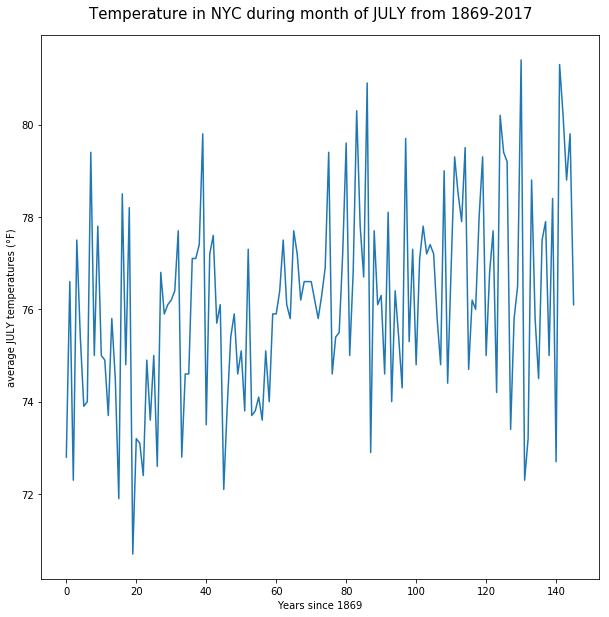

In [3]:
fig = plt.figure(figsize=(10,10))
plt.plot(mean_temp['JUL'])
plt.ylabel("average JULY temperatures (°F)")
plt.xlabel("Years since 1869")
fig.suptitle("Temperature in NYC during month of JULY from 1869-2017", fontsize=15, y=0.92)

#### Observation:
- The temperatures seem to have a trend of increasing as time has passed

#### A better comparison

Now I will divide my data set into two equal periods of 73 years each

- First Period  -> __1869 - 1941__
- Second Period -> __1942 - 2014__

This will help us compare the two different time periods of equal length to explore trends

#### First Period 

In [4]:
first_temp_period = mean_temp[mean_temp['YEAR'] < 1942]
first_temp_period.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7,51.4
1,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1,53.6
2,1871,28.3,30.2,44.2,52.0,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2,51.1
3,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41.0,26.7,51.0
4,1873,28.6,29.5,35.7,46.7,58.8,70.3,75.4,72.0,65.4,55.8,37.0,36.5,51.0


Text(0.5, 0.92, 'Temperature in NYC during month of JULY from 1869-1941')

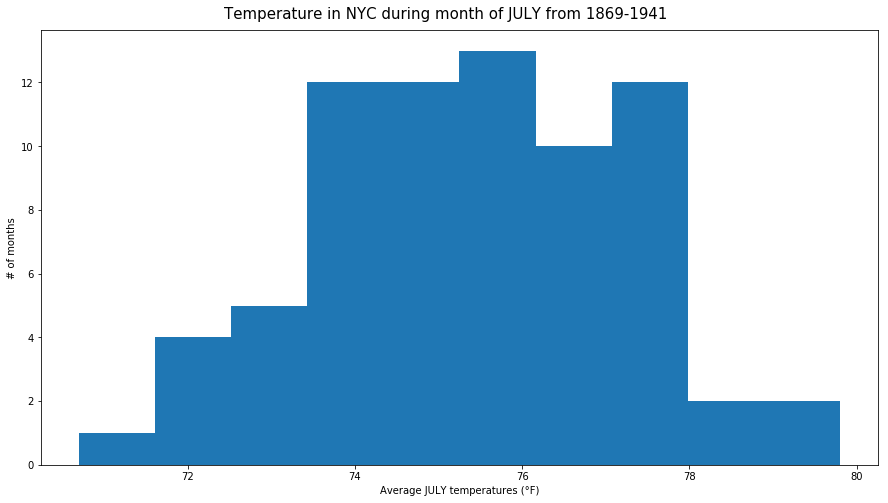

In [5]:
fig = plt.figure(figsize=(15,8))
plt.hist(first_temp_period['JUL'])
plt.xlabel("Average JULY temperatures (°F)")
plt.ylabel("# of months")
fig.suptitle("Temperature in NYC during month of JULY from 1869-1941", fontsize=15, y=0.92)

Looks somewhat symmetrical

#### Second Period

In [6]:
second_temp_period = mean_temp[mean_temp['YEAR'] >= 1942]
second_temp_period.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
73,1942,30.7,29.7,43.0,53.8,65.3,71.0,76.3,73.6,68.3,58.8,47.0,31.1,54.1
74,1943,30.8,34.6,40.2,46.1,62.6,76.2,76.9,75.9,67.4,55.7,45.4,33.0,53.7
75,1944,33.9,33.2,37.6,48.9,67.0,72.3,79.4,77.8,70.1,57.1,46.0,32.4,54.6
76,1945,25.1,33.9,51.1,55.6,59.2,70.9,74.6,73.4,70.3,56.2,47.6,31.0,54.1
77,1946,34.1,31.7,49.8,50.4,61.9,69.7,75.4,70.9,69.8,61.7,50.5,37.9,55.3


Text(0.5, 0.92, 'Temperature in NYC during month of JULY from 1942-2014')

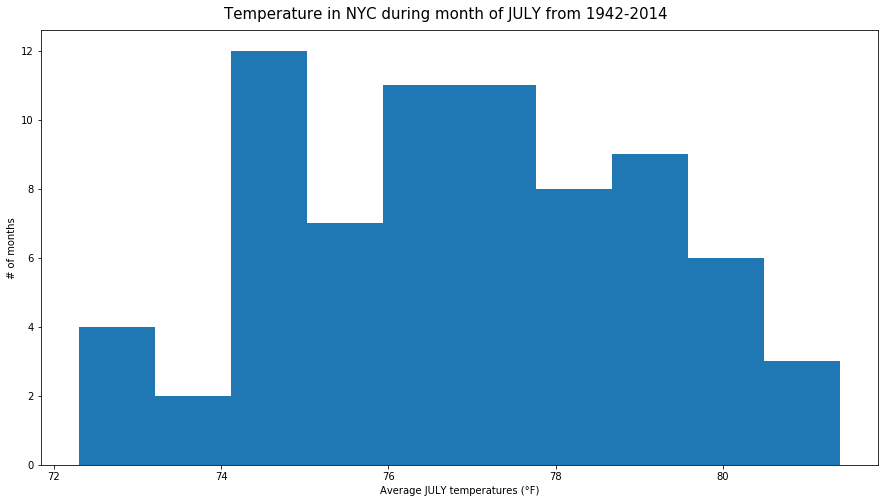

In [7]:
fig = plt.figure(figsize=(15,8))
plt.hist(second_temp_period['JUL'])
plt.xlabel("Average JULY temperatures (°F)")
plt.ylabel("# of months")
fig.suptitle("Temperature in NYC during month of JULY from 1942-2014", fontsize=15, y=0.92)

This also looks symmetrical

#### Some key notes for the histogram below

- Blue -> First time period (1869 - 1941)
- Orange  -> Second time period (1942 - 2014)

### Histogram for two Periods

Text(0.5, 0.92, 'Temperature in NYC during month of JULY since 1869 -1941 and 1942-2014')

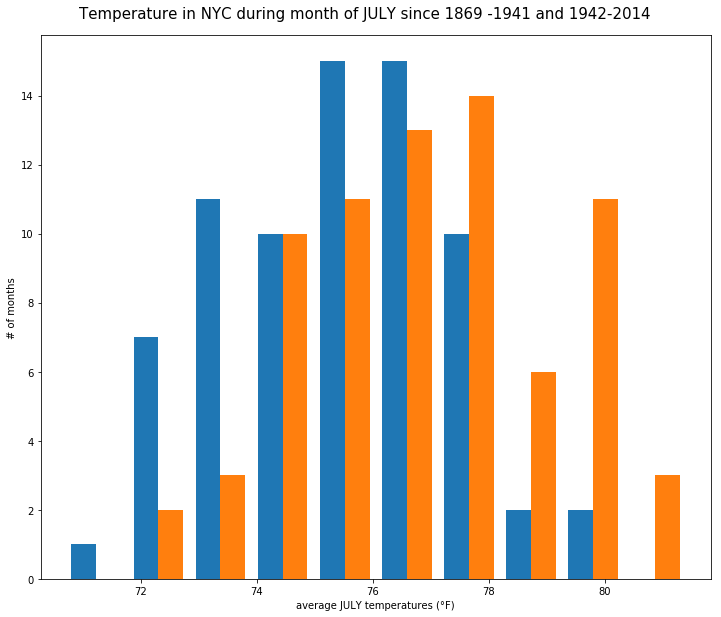

In [60]:
fig2 = plt.figure(figsize=(12,10))
plt.hist([first_temp_period['JUL'], second_temp_period['JUL']])
plt.xlabel("average JULY temperatures (°F)")
plt.ylabel("# of months")
fig2.suptitle("Temperature in NYC during month of JULY since 1869 -1941 and 1942-2014", fontsize=15, y=0.92)

The histogram for second periods depicts greater mean temperatures and higher average temperatures

### BoxPlots

Text(0.5, 0.92, 'Difference of Temperatures in First Period vs Second Period')

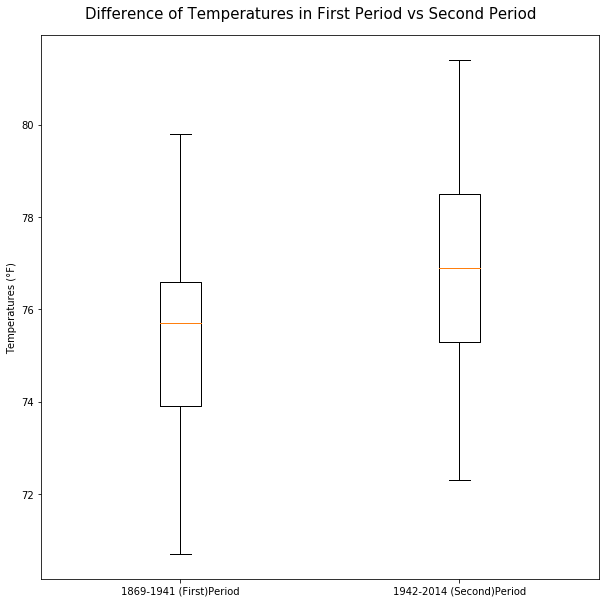

In [61]:
fig3 = plt.figure(figsize=(10,10))
plt.boxplot([first_temp_period['JUL'],second_temp_period['JUL']])
            
plt.xticks([1,2], ["1869-1941 (First)Period", "1942-2014 (Second)Period"])
plt.ylabel("Temperatures (°F)")
fig3.suptitle("Difference of Temperatures in First Period vs Second Period", fontsize=15, y=0.92)

Even the Median for second period is higher. The mode looks higher as well

#### Mean

In [62]:
first_period_mean = first_temp_period['JUL'].mean()
second_period_mean = second_temp_period['JUL'].mean()
print("Mean for the first period (1869-1919) =" ,first_period_mean,"°F")
print("Mean for the second period (1967-2017) =" ,second_period_mean, "°F")

Mean for the first period (1869-1919) = 75.38356164383563 °F
Mean for the second period (1967-2017) = 76.90684931506848 °F


#### Maximum

In [63]:
print("Max for the first period (1869-1919) =" ,first_temp_period['JUL'].max(), "°F")
print("Max for the second period (1967-2017) =" ,second_temp_period['JUL'].max(), "°F")

Max for the first period (1869-1919) = 79.8 °F
Max for the second period (1967-2017) = 81.4 °F


#### Range

In [64]:
print("Range for the first period (1869-1919) =" ,first_temp_period['JUL'].max() - first_temp_period['JUL'].min(),"°F")
print("Range for the second period (1967-2017) =" ,second_temp_period['JUL'].max() - second_temp_period['JUL'].min(),"°F")

Range for the first period (1869-1919) = 9.099999999999994 °F
Range for the second period (1967-2017) = 9.100000000000009 °F


#### Interquartile Range

In [65]:
first_interquartile = first_temp_period['JUL'].quantile(q=0.75) - first_temp_period['JUL'].quantile(q=0.25,)
second_interquartile = second_temp_period['JUL'].quantile(q=0.75) - second_temp_period['JUL'].quantile(q=0.25)
print("Interquartile for first period  =", first_interquartile,"°F")
print("Interquartile for Second period =", second_interquartile,"°F")

Interquartile for first period  = 2.6999999999999886 °F
Interquartile for Second period = 3.200000000000003 °F


#### Variance & Standard Deviation

In [66]:
first_var = first_temp_period['JUL'].var()
second_var = second_temp_period['JUL'].var()
first_std = math.sqrt(first_var)
second_std = math.sqrt(second_var)
print("Variance for first period", first_var,"°F")
print("Variance for second period", second_var,"°F")
print("\nStandard Deviation for first period", first_std,"°F")
print("Standard Deviation for second period", second_std,"°F")

Variance for first period 3.4447260273972646 °F
Variance for second period 4.726757990867582 °F

Standard Deviation for first period 1.855997313413267 °F
Standard Deviation for second period 2.1741108506393094 °F


#### Obervations:

From the boxplots and histograms above:
- The average temperatures in second period(1968-2018) are higher than the first(1869-1919)
- The mean for first period is 75.2°F whereas for second period is 77.1°F which is about 2°Fahrenheit higher
- Variance for first period is also less than second period
- Likewise, Interquartile range and range for second period is also greater

## Relationship between years since 1869 and Annual Average Temperatures in NYC

Now I will find the relationship between years that have passed since 1869 and how the Annual Average Temperature has changed over the time

In [67]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [68]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(mean_temp["YEAR"],mean_temp['ANNUAL'])

In [69]:
print("Slope is ", slope)
print("Interscept is", intercept)

Slope is  0.02850761088563908
Interscept is -1.4619100961121276


Text(0.5, 0.92, 'Relationship between Years since 1869, and Average Annual Temperatures')

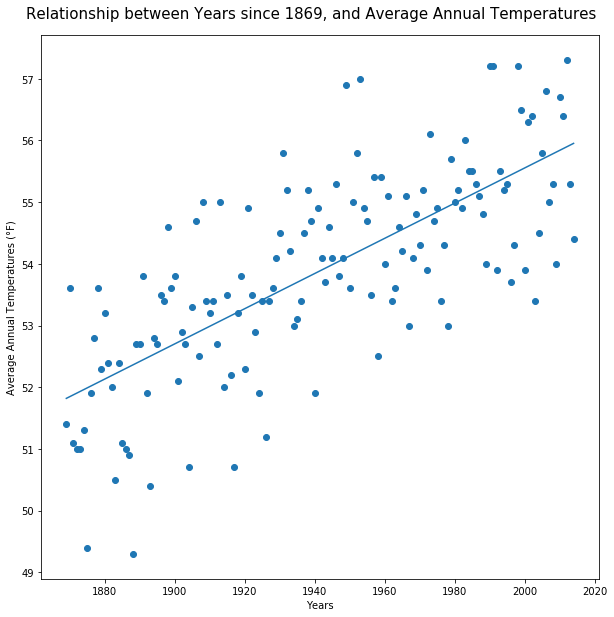

In [70]:
fig = plt.figure(figsize=(10,10))
plt.scatter(mean_temp['YEAR'],mean_temp['ANNUAL'])
sorted_order = np.argsort(mean_temp["YEAR"])
plt.plot(mean_temp["YEAR"][sorted_order], predictions[sorted_order])
plt.ylabel("Average Annual Temperatures (°F)")
plt.xlabel("Years")
fig.suptitle("Relationship between Years since 1869, and Average Annual Temperatures", fontsize=15, y=0.92)

A positive linear relationship is observed between __ANNUAL average__ temperatures and years since 1869

The Slope tells us that for every one year, there is an increase of 0.0285 Fahrenheit Temperature

Text(0.5, 0.92, 'Relationship between years and the average annual temperatures')

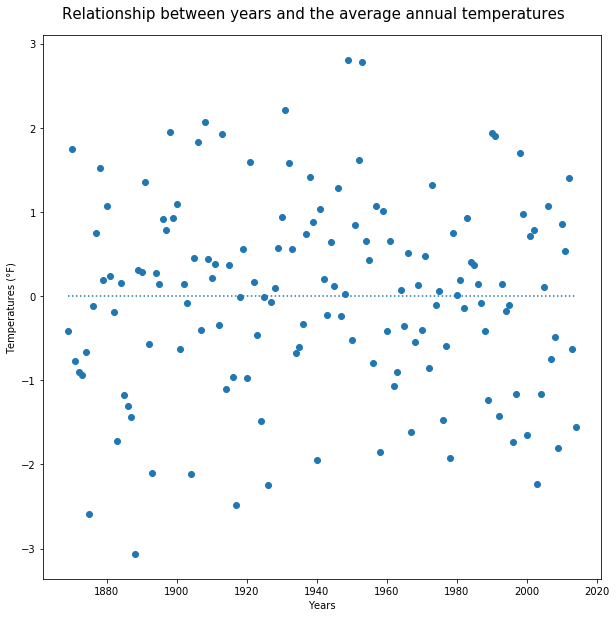

In [111]:
fig = plt.figure(figsize=(10,10))
plt.scatter(mean_temp['YEAR'], residuals)
sorted_order = np.argsort(mean_temp['YEAR'])
plt.plot([mean_temp['YEAR'].min(), mean_temp['YEAR'].max()], [0,0], linestyle='dotted')
plt.xlabel('Years')
plt.ylabel('Temperatures (°F)')
fig.suptitle('Relationship between years and the average annual temperatures', fontsize=15, y=0.92)

__R squared Value__

In [112]:
np.var(predictions) / np.var(mean_temp['ANNUAL'])

0.5269676705956233

In [74]:
print('Slope:', slope)
print('Intercept:', intercept)
# print('Intercept:', residuals)

Slope: 0.02850761088563908
Intercept: -1.4619100961121276


In [107]:
np.cov(mean_temp['YEAR'],c02_data['data_mean_nh'])[0][1]

1171.649642867516

### Comments

The average temperature in NYC have been rising since 1869.
The residuals graph is observed to relatively homoskedastic. The relationship isn't strong, however, there is still a positive linear relationship here.

There is an R-squared value of 52.69% here depicts 52.69% of the variation in the Temperatures is accounted for by its regression on number of Years passed.

#### Confidence Intervals and Predication Intervals

In [108]:
def get_intervals(a, b, residuals):
    t = stats.t(df=len(a) - 2).ppf(0.975)
    s_err = np.sum(np.power(residuals, 2))
    confidence_interval = t * np.sqrt((s_err/(len(a) - 2))*(1/len(a) + (np.power((a - a.mean()), 2)/((np.sum(np.power(a,2))) - len(mean_temp)*(np.power(a.mean(),2))))))
    prediction_interval = t * (np.std(residuals))
    return abs(confidence_interval), prediction_interval

In [109]:
ci, pi = get_intervals(mean_temp['YEAR'], mean_temp['ANNUAL'], residuals)

Text(0.5, 0.92, 'Temperatures of NYC')

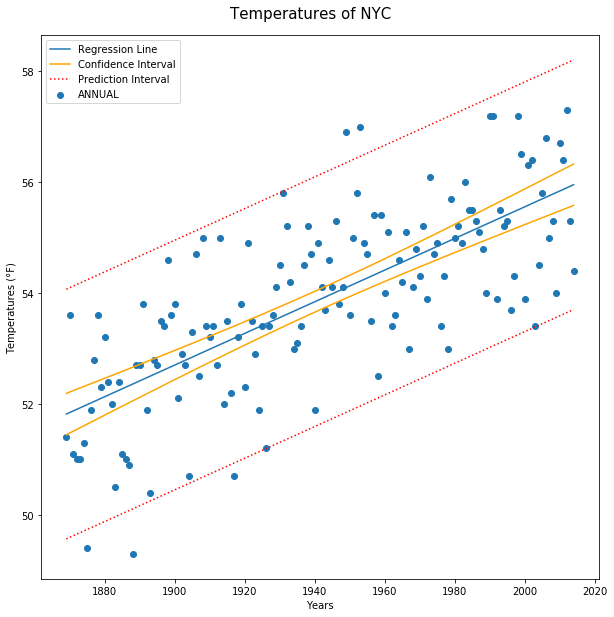

In [110]:
fig = plt.figure(figsize=(10,10))
plt.scatter(mean_temp['YEAR'], mean_temp['ANNUAL'])
sorted_order = np.argsort(mean_temp['YEAR'])
plt.plot(mean_temp['YEAR'][sorted_order], predictions[sorted_order], label='Regression Line')
plt.plot(mean_temp['YEAR'][sorted_order], (predictions + ci)[sorted_order], color='orange', label='Confidence Interval')
plt.plot(mean_temp['YEAR'][sorted_order], (predictions - ci)[sorted_order], color='orange', label='_Confidence Interval')
plt.plot(mean_temp['YEAR'][sorted_order], (predictions + pi)[sorted_order], color='red', label='Prediction Interval', linestyle='dotted')
plt.plot(mean_temp['YEAR'][sorted_order], (predictions - pi)[sorted_order], color='red', label='_Prediction Interval', linestyle='dotted')
plt.xlabel('Years')
plt.ylabel('Temperatures (°F)')
plt.legend()
fig.suptitle('Temperatures of NYC', fontsize=15, y=0.92)



The orange lines are the 95% confidence interval of where the mean Y value for a given X value will lay, and the red lines are the 95% confidence interval of where a new Y value for a given X value could land.  Most of the observed points are between the red lines - as 95% of them should be.

## Exploring Dataset for Carbondioxide levels

Dataset __#2__: __C02 levels in the atmosphere__

- This the dataset for Carbondioxide (ppm)* since the year 0 A.D to 2014

***ppm referts to parts per million**

In [5]:
total_c02_data = pd.read_csv('/home/ahsan/Spring2019/csc217/Project/Datasets/C02_datasets/mole_fraction_c02_since_year_0.csv',header=0)
total_c02_data.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


### However
#### We are only interested in data from 1869 - 2014 for this dataset

#### Dataset contains 3 columns
 - Global 
 - Northern Hemisphere
 - Southern Hemisphere
 
We will focus on __Northern Hemisphere__

In [42]:
c02_data = total_c02_data[total_c02_data['year'] >= 1869]
c02_data.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
1869,1869,287.225000,287.261016,287.188983
1870,1870,287.355000,287.392248,287.317751
1871,1871,287.494000,287.533380,287.454619
1872,1872,287.663999,287.706570,287.621429
1873,1873,287.859999,287.904581,287.815418


### Before anything let's have a general look of how the C02 levels have changed over the past 2000+ years

Text(0.5, 0.92, 'Trend of C02 levels since 0 A.D')

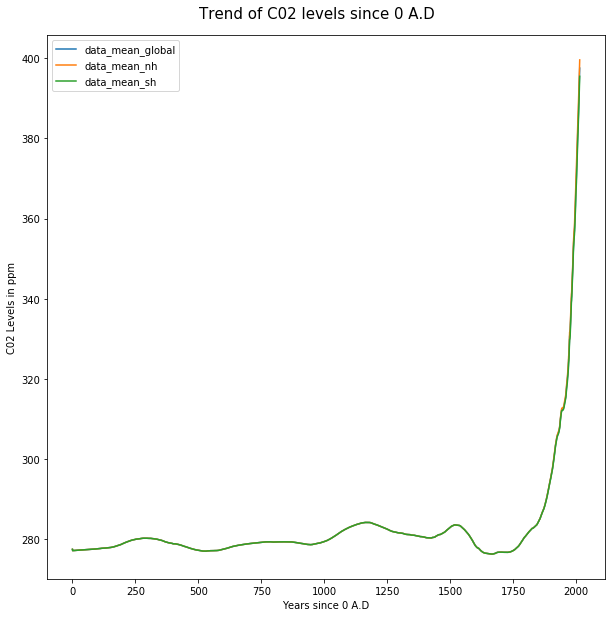

In [43]:
figx = plt.figure(figsize=(10,10))
plt.plot(total_c02_data['data_mean_global'])
plt.plot(total_c02_data['data_mean_nh']) # nh is for northern hemisphere
plt.plot(total_c02_data['data_mean_sh']) # sh is for southern hemisphere
plt.legend()
plt.xlabel('Years since 0 A.D')
plt.ylabel('C02 Levels in ppm')
figx.suptitle('Trend of C02 levels since 0 A.D', fontsize=15, y=0.92)

### For the years after 1869 in Northern Hemisphere

Text(0.5, 0.92, 'Trend of C02 levels')

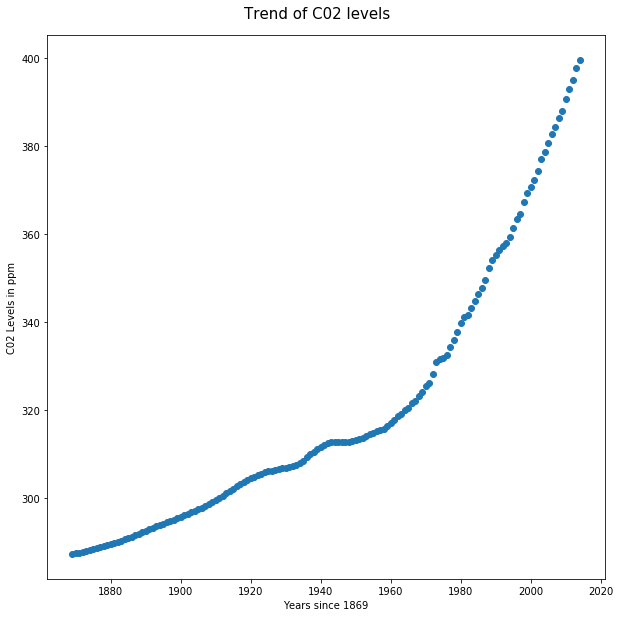

In [44]:
figx2 = plt.figure(figsize=(10,10))
plt.scatter(c02_data['year'], c02_data['data_mean_nh'])
plt.xlabel('Years since 1869')
plt.ylabel('C02 Levels in ppm')
figx2.suptitle('Trend of C02 levels', fontsize=15, y=0.92)

#### Observation:
A steep curve is seen after the years 1800
There seems to be a non-linear and more of a quadratic relationship between time and C02 levels in the atmosphere

## Relationship between Average Annual Temperatures in New York City and C02 Levels

In [78]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [87]:
slope_c02, intercept_c02, predictions_c02, residuals_c02 = evaluate_linear_relationship(mean_temp['ANNUAL'],c02_data["data_mean_nh"])

In [88]:
print("Slope is ", slope_c02)
print("Interscept is", intercept_c02)

Slope is  11.545049441076177
Interscept is -301.64351668044264


Text(0.5, 0.92, 'Relationship between Temperatures and C02 since 1869')

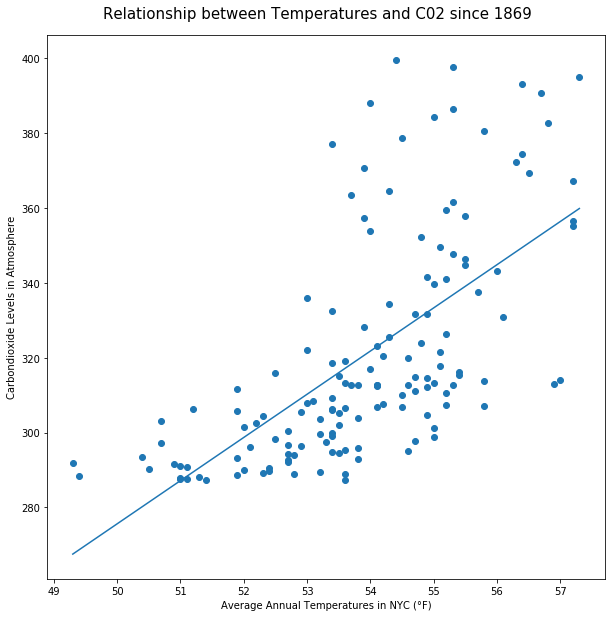

In [89]:
fig = plt.figure(figsize=(10,10))
plt.scatter(mean_temp["ANNUAL"],c02_data["data_mean_nh"])
sorted_order = np.argsort(mean_temp["ANNUAL"])
plt.plot(mean_temp['ANNUAL'][sorted_order], predictions_c02[sorted_order])
plt.ylabel("Carbondioxide Levels in Atmosphere")
plt.xlabel('Average Annual Temperatures in NYC (°F)')
fig.suptitle("Relationship between Temperatures and C02 since 1869", fontsize=15, y=0.92)

#### What is R squared Value of relationship between these two variables?

In [90]:
np.power(stats.pearsonr(mean_temp["ANNUAL"], c02_data['data_mean_nh'])[0], 2)

0.4135102754746649

### Comments

There is an R-squared value of 41.35% here, meaning that the 41.35% of the variation in the Temperatures is accounted for by its regression on the levels of Carbondioxide in Northern Hemisphere

The Slope tells us that for every one degrees of increase, there is 11.54ppm Carbondioxide that contributed

#### What is the covariance between two variables, that is year and C02 levels

In [103]:
np.cov(c02_data['data_mean_nh'],mean_temp['ANNUAL'])[0][1]

31.8436186289212

## Conclusion:

From my data analysis and exploration first I took temperature dataset for __JULY__, and divided it into two equal parts. I used different visualization techniques to see what was going on. It was evident just by looking that the mean temperatures in second time period(1942-2014) were greater than the ones in first period(1869-2014). The actual mean temperatures had seen in increase of about __2°Fahrenheit__

I also used the column for average yearly mean temperatures for the New York City and tracked down the trend of temperatures with increasing years. I found out that an increase of __0.02°F__ was observed with every one year passed.
I also found out that my R-squared Value was about 53%, meaning that __53%__ of the variation in the Temperatures is accounted for by its regression on number of Years passed.

Finally I explored the dataset for Carbondioxide Levels in the Atmosphere and how the trend has been since 1869. I visualized the data to show c02 has increased in Northern Hemisphere with a very big rate. There was rather a quadratic Relationship between number of years and C02 Levels(ppm) from 1869 to 2014.
My R-squared value for C02 and Annual Average Temperature was around __41%__.

With all my data analysis, therefore, it is safe to say that there exists a relationship between Carbondioxide levels, and increasing Earth Temperatures - Also that C02 emissions have greatly contributed to increasing temperatures of my favorite city, __New York__.
I think we need to take immediate steps to control how we are contributing to __C02 emissions before it becomes too late__.